# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

### Multivariate analysis

Start by looking at missing values to determine what actions need to be taken around this, if any.

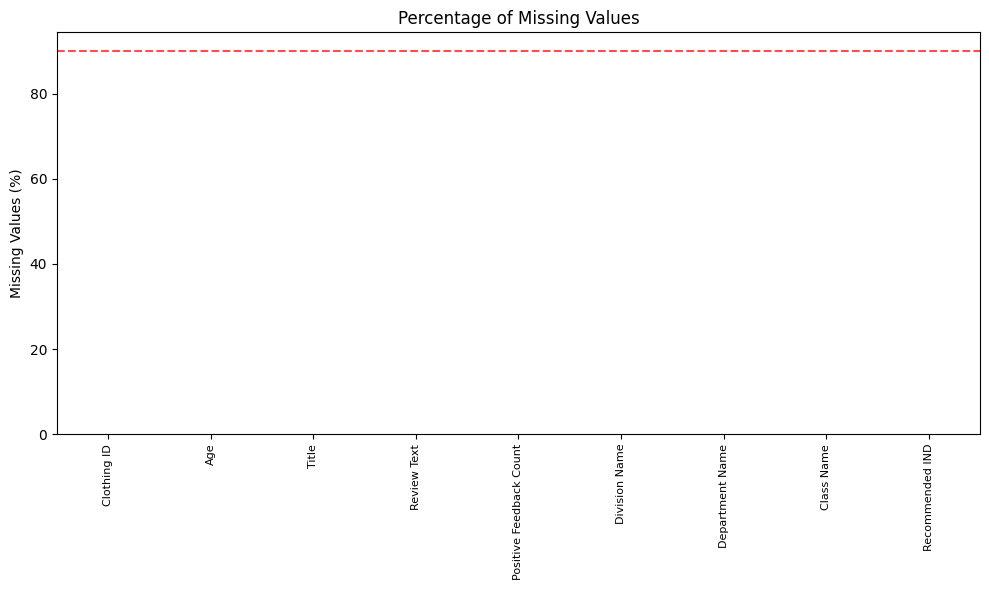

In [10]:
from matplotlib import pyplot as plt
null_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
threshold = 90

# Bar Chart Visualization with conditional colors
plt.figure(figsize=(10, 6))
ax = null_percentage.plot(kind='bar', color='#5A287D')
plt.title('Percentage of Missing Values')
plt.ylabel('Missing Values (%)')
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.7)  # Add a reference line
plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()

There are no null values across any of our features, including the target feature, which confirms there are no further actions that are required in the preprocessing step to address this. 

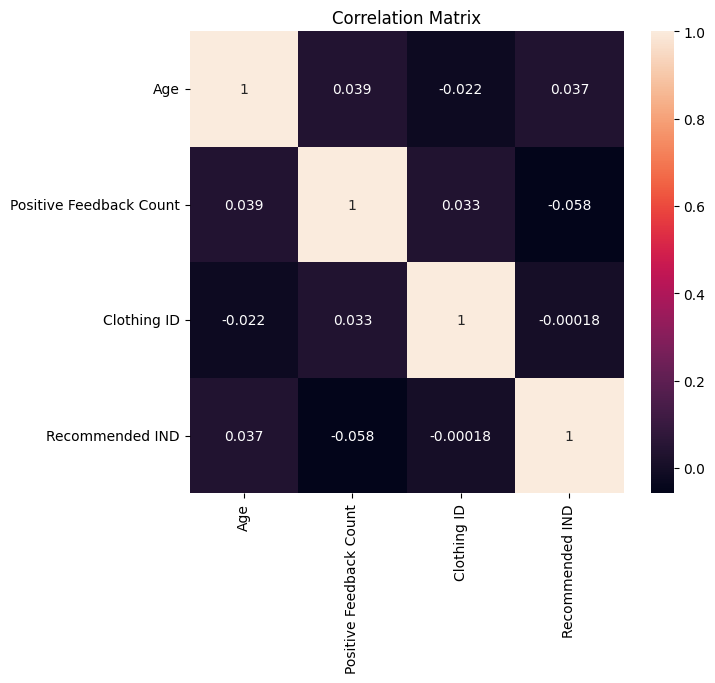

In [29]:
import seaborn as sns
data_num= df[['Age', 'Positive Feedback Count', 'Clothing ID', 'Recommended IND']]
corr_matrix = data_num.corr()

# plot the correlation matrix
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


Creating a correlation matrix with the 4 numeric features (including binary target feature) has shown us that there is very small correlation between them so we cannot derive any meaningful relationship between them at this point.

### Univariate analysis

#### Categorical Features

Start by looking at categorical features to understand the possible values and distribution across categories. 

In [5]:
division = X_train['Division Name'].value_counts()
print(division)

Division Name
General           10497
General Petite     6100
Name: count, dtype: int64


In [6]:
department = X_train['Department Name'].value_counts()
print(department)

Department Name
Tops        7818
Dresses     4845
Bottoms     2852
Jackets      813
Intimate     172
Trend         97
Name: count, dtype: int64


In [7]:
class_name= X_train['Class Name'].value_counts()
print(class_name)

Class Name
Dresses           4845
Knits             3554
Blouses           2337
Sweaters          1095
Pants             1041
Jeans              885
Fine gauge         832
Skirts             693
Jackets            549
Outerwear          264
Shorts             232
Lounge             172
Trend               97
Casual bottoms       1
Name: count, dtype: int64


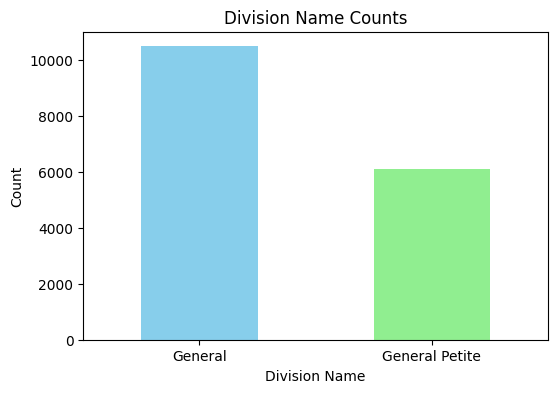

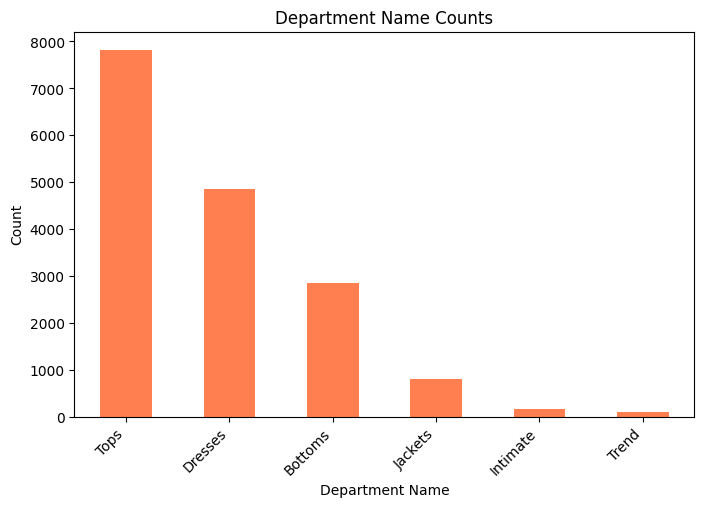

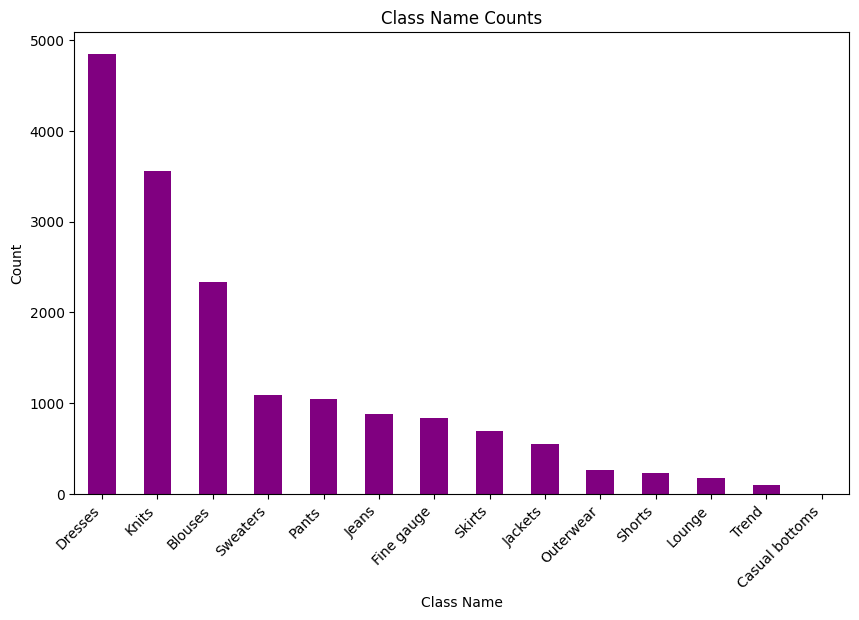

In [8]:
import matplotlib.pyplot as plt
# Plot for Division Name
plt.figure(figsize=(6,4))
division.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Division Name Counts')
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for Department Name
plt.figure(figsize=(8,5))
department.plot(kind='bar', color='coral')
plt.title('Department Name Counts')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot for Class Name
plt.figure(figsize=(10,6))
class_name.plot(kind='bar', color='purple')
plt.title('Class Name Counts')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that division is split between general and general petite somewhat evenly. Tops is the most prevalent department type, with stead incremental decreases to dresses, bottoms and jackets. Intimate and trend departments are fairly uncommon. The most prevalent class is dresses. This helps us understand what we are dealing with as we build the pre processing part of the pipeline. 

#### Numerical Features

In [14]:
X['Age'].describe()

count    18442.000000
mean        43.383635
std         12.246264
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

We can see that the reviwers age ranges from 18-99, with a mean of 43.

In [16]:
X['Positive Feedback Count'].describe()

count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

For positive feedback count, the values range from 0-122 votes marking a review as positive. The mean however, it particularly low at 2.7, showing that most reviews get very few positive votes, backed up by the 3rd quartile being only 3. This feature will likely have some outliers, which is important to consider. 

As Clothing ID is an identification integer for each clothing item, there is no meaningful information that can be derived from univariate analysis. In fact, there is a general lack of predictve power in this feature. Although there may be potential groupings where the same product is likely to get more positive/ negative reviews, this information could also be captured by the other more broad categorical features, for example 'trend' items getting similr review patterns. The high cardinality risks overfitting, as well as adding additional noise to the model, meaning it is more logical to drop this feature before getting to the modelling stage. 

#### Text features

In [21]:
title_length= X["Title"].apply(len)
print((title_length).describe())

count    18442.000000
mean        19.067672
std          9.569247
min          2.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         52.000000
Name: Title, dtype: float64


The mean title of the review is 19 words, and the range is from 2- 52. This is important to note as we may need to consider the different length of the texts when applying prosses such as tokenisation and NLP. 

In [22]:
review_length= X["Review Text"].apply(len)
print((review_length).describe())

count    18442.000000
mean       319.989535
std        141.953692
min          9.000000
25%        201.000000
50%        317.500000
75%        478.000000
max        508.000000
Name: Review Text, dtype: float64


The average review length is 319 words, with a range from 9- 508 words. Same as above, it is important to be aware of this before applying any other techniques to derive insights from the text. 

## Building Pipeline

Before building out any pipelines, we need to define the seperate data types we have been dealing with in the EDA stage. 
These will be as follows: 
Numerical (Note: Clothing ID has been dropped due to the reasons given above)
* Age 
* Positive Feedback Count  

Categorical
* Division
* Department 
* Class name 

Text 
* Title 
* Review text 

In [33]:
#drop Clothing ID 
X.drop('Clothing ID', axis=1)
#define numeric features and print 
num_features =(
    X[['Age', 'Positive Feedback Count']].columns
)
print('Numerical features:', num_features)
#define categorical features and print
cat_features =(
   X[['Division Name', 'Department Name', 'Class Name']].columns
)    
print('Categorical features:', cat_features)
#define text features and print 
text_features =(
    X[['Title', 'Review Text']].columns
)
print ('Review Text features:', text_features)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Title', 'Review Text'], dtype='object')


### Numerical Features Pipelines

For the numeric pipeline, the decision has been taken to apply box-cox transformation to stabilise the variance with the aim of making the data more normally distributed. We saw during the EDA stage that both numeric features, but particularly positive review count, were negatively skewed as they had lot of low values. 

Once the box cox transformation has been applied, min max scaler is then used to scale the features to a range between 0 and 1. This will then transform the values to be based on the minimum and maximum values of the feature, ensring to preserve the relationship between the data points. 

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ 
    (
    'boxcox',
    PowerTransformer(method='box-cox'),
    ),
    (
    'scaler', 
    MinMaxScaler())
])
num_pipeline

Pipeline(steps=[('boxcox', PowerTransformer(method='box-cox')),
                ('scaler', MinMaxScaler())])

### Categorical Features Pipeline

For our categorical features, we want to be careful to not imply a rank order. The best approach for concerting categorical features to be useful for a machine learning model is to apply One Hot Encoding, where it creates a binary feature for each category in the original feature. 

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
    'cat_encoder',
    OneHotEncoder(
    sparse_output= False,
    handle_unknown= 'ignore',
    )
    ),
])
cat_pipeline

Pipeline(steps=[('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Training Pipeline

## Fine-Tuning Pipeline